**1.Defining the Question**

To determine whether a Passanger Survived or died during the sinking of the Titanic in 1912.

**2.Metric for Success**

To obtain an accuracy score of at least 85% for my model.

**3.The Context**

The Titanic was a ship that sunk in the year 1912. Thus given the dataset with information of the passengers we would like to determine whether a passenger survived the incident or not.

**4.The Experimental Design Taken**

This first step of this analysis will be loading the dataset , the appropriate libraries and then taking the necessary steps to clean the data.
Next I will carry out Univariate and Bivariate data analysis while dealing with the outliers found within my dataset
Finally I will build KNN models and evaluate their performance on the dataset at hand and then provide observations and recommendations on the suitability of each of the tested models on their appropriateness of solving the given problem.

**5.The Appropriateness of the data to answer the given question.**

Given the Question at hand the data provided was appropriate for my analysis

**LOADING THE LIBRARIES**

In [1]:
# Importing my Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;sns.set_style("whitegrid")
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler,Normalizer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
#load the training dataset
train=pd.read_csv("train.csv")
train.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [3]:
train.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
train.shape

(891, 12)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
#load the test dataset
test=pd.read_csv("test.csv")
test.head(4)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S


In [8]:
test.tail(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [9]:
test.shape

(418, 11)

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [12]:
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

**DATA CLEANING**

In [13]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:

train.duplicated().sum()

0

In [15]:
train.drop(['Cabin','PassengerId','Name','Ticket'],axis=1,inplace=True)

In [16]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [17]:
#Dealing with the null values in age,find mean per gender and replace in the missing data.
train.groupby(['Pclass','Sex'])['Age'].mean()



Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64

In [19]:
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    Sex = cols[2]
    if pd.isnull(Age):
        if (Pclass == 1) & (Sex == 'female') :
            return 34
        elif (Pclass == 1) and (Sex == 'male'):
            return 41
        elif (Pclass == 2 ) and (Sex == 'female'):
          return 28
        elif (Pclass == 2) and (Sex == 'male'):
          return 30
        elif (Pclass == 3) and (Sex == 'female'):
          return 22
        elif (Pclass == 3) and (Sex == 'male'):
          return 22
    else:
        return Age

In [20]:
train['Age'] = train[['Age', 'Pclass','Sex']].apply(age_approx, axis=1)

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [22]:
train.dropna(inplace=True)

In [23]:
train.isnull().sum().sum()

0

**EXPLONATORY DATA ANALYSIS**

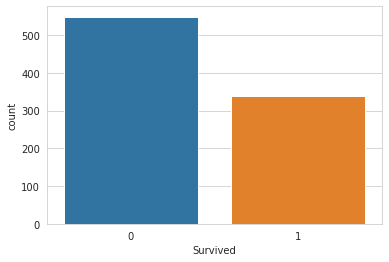

In [24]:
sns.countplot(x = "Survived",data = train)

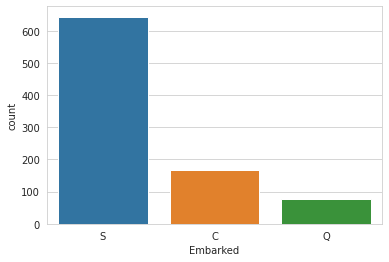

In [25]:
sns.countplot(x = "Embarked",data = train)

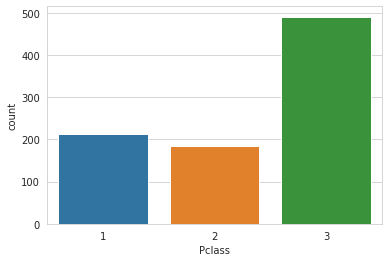

In [26]:
sns.countplot(x = "Pclass",data = train)

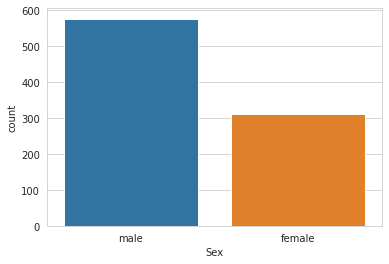

In [27]:
sns.countplot(x = "Sex",data = train)

Text(0.5, 1.0, 'Frequency Plots of  Passengers who Survived based on Gender')

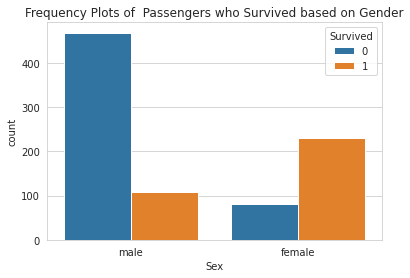

In [35]:
sns.countplot(x=train["Sex"],hue = train["Survived"],data = train)
plt.title('Frequency Plots of  Passengers who Survived based on Gender')

Text(0.5, 1.0, 'Frequency plots of Passengers who Survived on the Titanic by  Class')

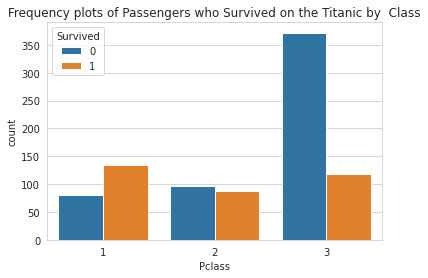

In [36]:
sns.countplot(x=train["Pclass"],hue = train["Survived"],data = train)
plt.title('Frequency plots of Passengers who Survived on the Titanic by  Class')

Text(0.5, 1.0, 'Frequency plots of Passenger Class on the Titanic by Gender')

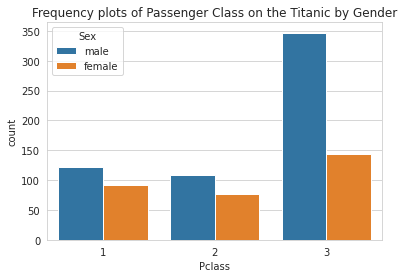

In [37]:
sns.countplot(x=train["Pclass"],hue = train["Sex"],data = train)
plt.title('Frequency plots of Passenger Class on the Titanic by Gender')

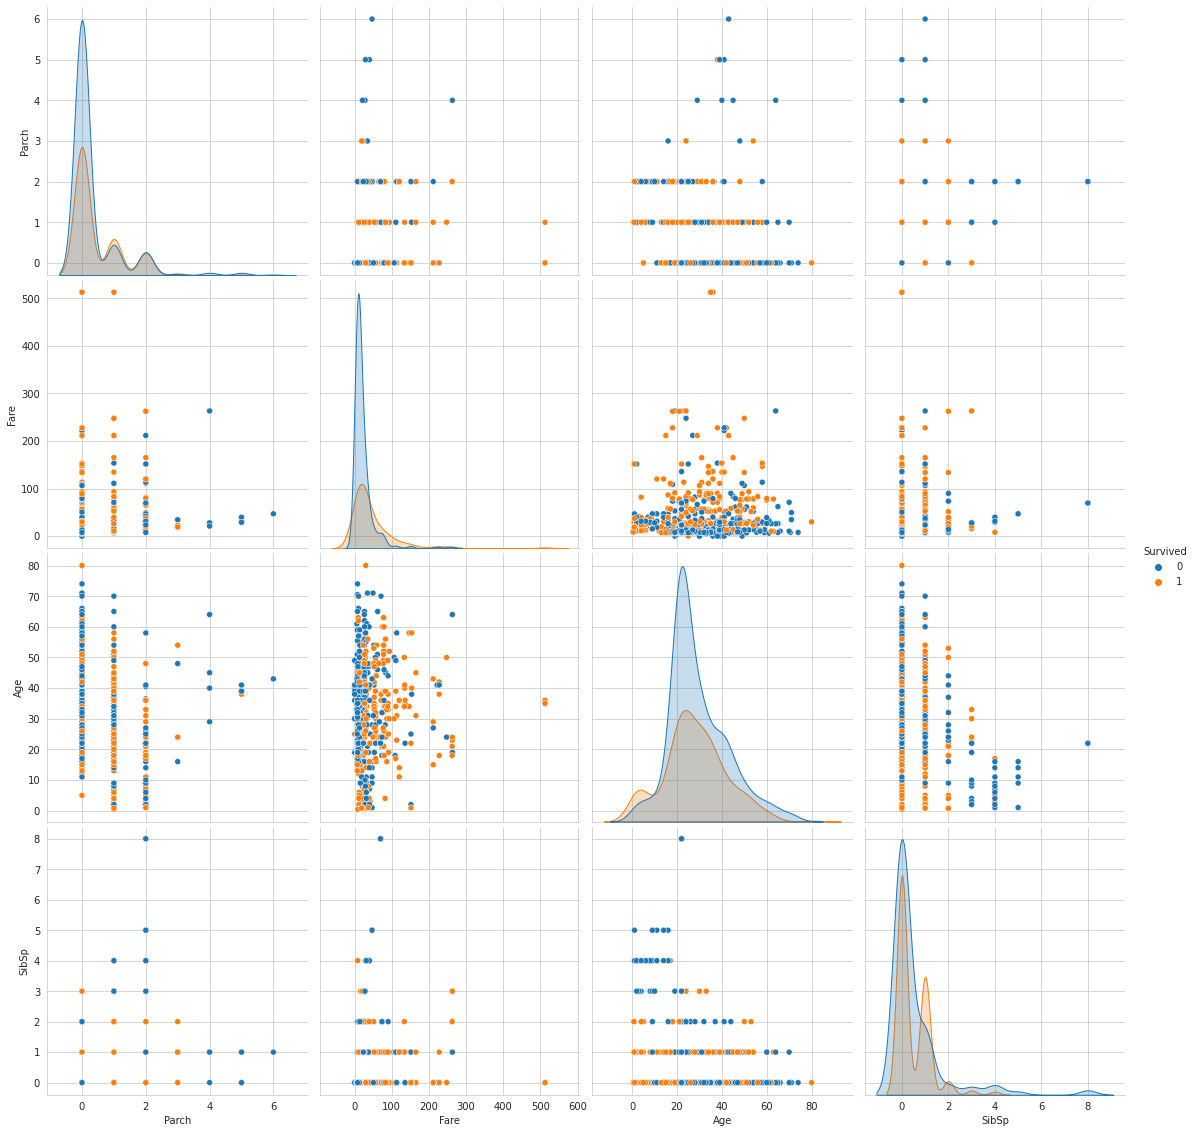

In [38]:
sns.pairplot(train[["Survived","Parch","Fare","Age",'SibSp']], hue="Survived", height=4);
plt.show()

Text(0.5, 1.0, 'Boxplot of Passenger Age by Class')

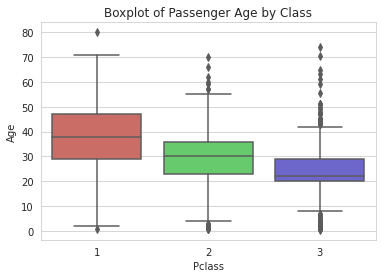

In [39]:
# Plotting a boxplot for Passenger class and Age
sns.boxplot(x='Pclass', y='Age', data=train, palette='hls')
plt.title('Boxplot of Passenger Age by Class')


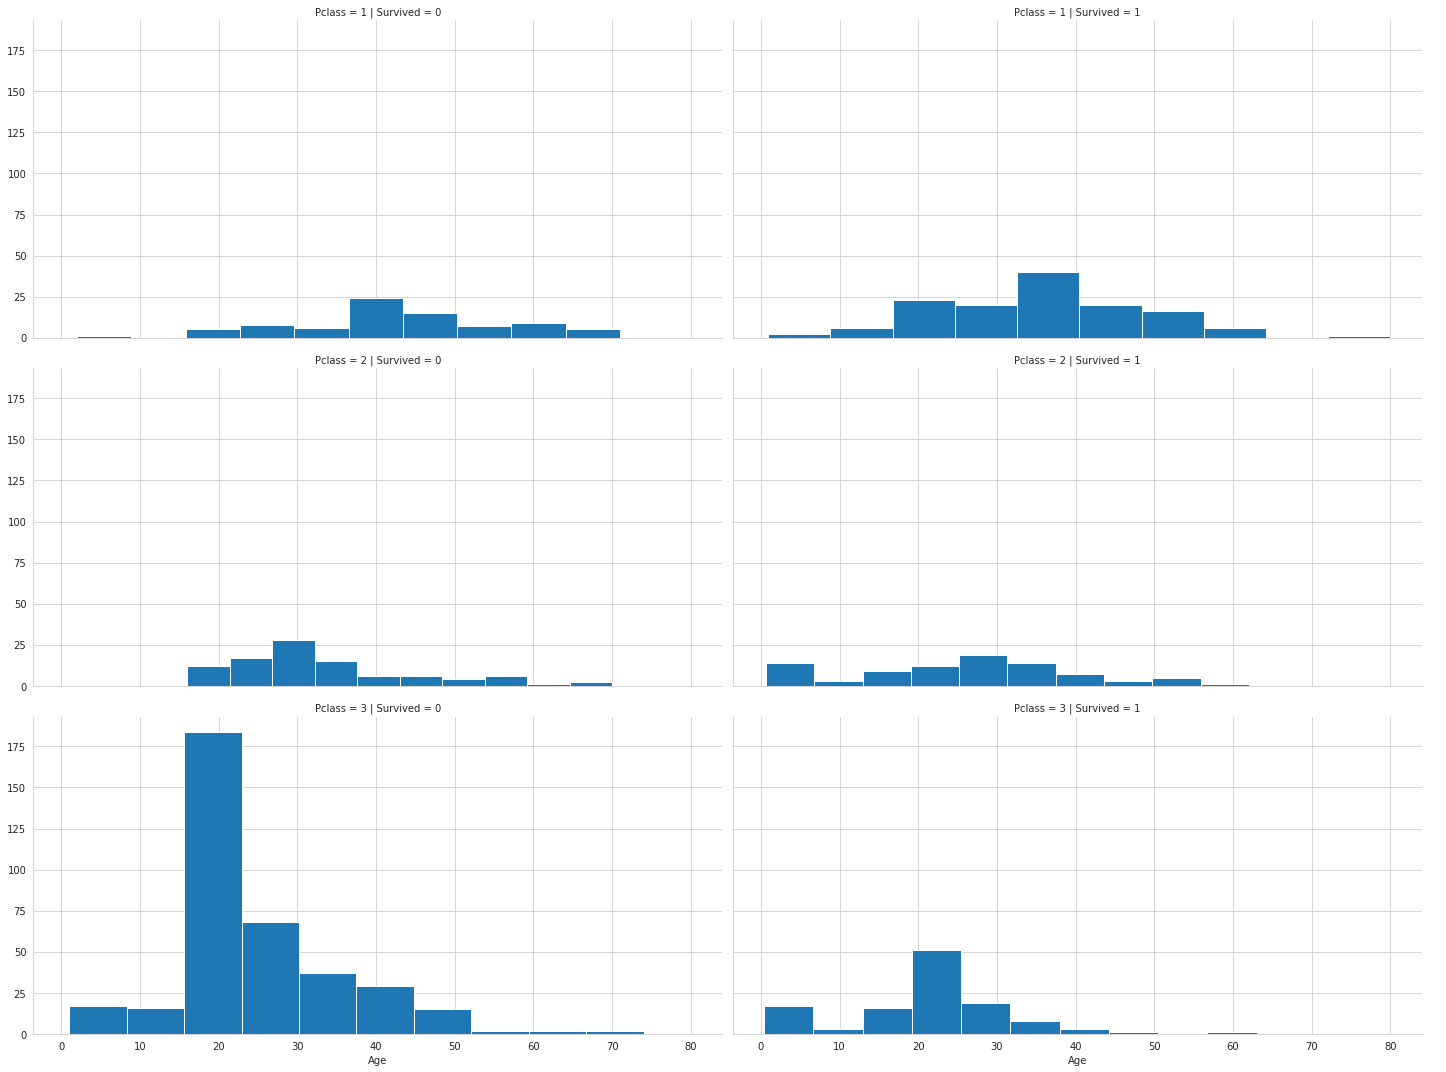

In [44]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', height=5, aspect=2)
grid.map(plt.hist, 'Age', bins=10)
grid.add_legend()

Majority of the Passengers in the Third class lost their lives , these passengers were mostly between 20-30 years old.
The first class had the most survivors. These passenegrs were between 30-40 years old.





In [45]:
train.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


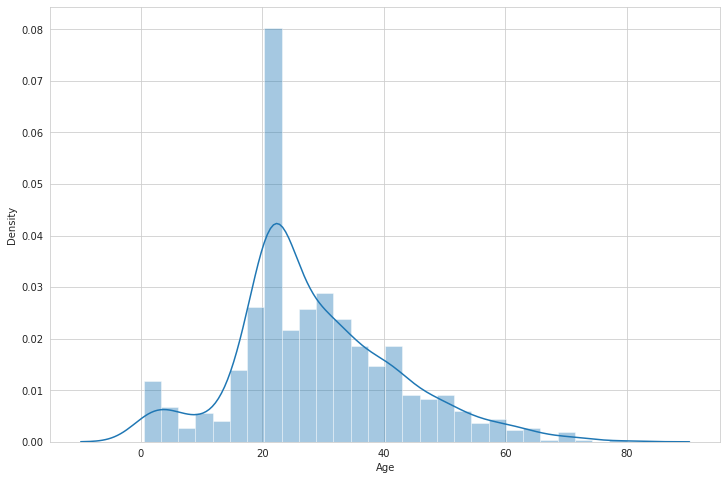

In [50]:
plt.figure(figsize=(12,8))
sns.distplot(train['Age'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


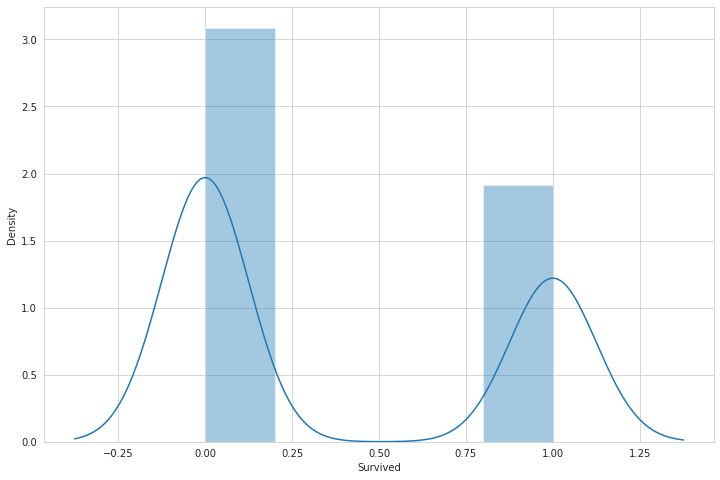

In [54]:
plt.figure(figsize=(12,8))
sns.distplot(train['Survived'])
plt.show()

**FEATURE ENGINEERING**

In [55]:
train.tail(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
888,0,3,female,22.0,1,2,23.45,S
889,1,1,male,26.0,0,0,30.00,C
890,0,3,male,32.0,0,0,7.75,Q


In [56]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train['Sex']=le.fit_transform(train['Sex'])
train['Embarked']=le.fit_transform(train['Embarked'])


In [57]:
train.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2



**KNN 80/20**




In [59]:
X=train.drop("Survived",1)
y=train['Survived']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [63]:
# Scaling the Features
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [61]:
#apply linear discriminnt analysis to make data make more accurate

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [71]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [75]:
y_pred = classifier.predict(X_test)
y_pred
accuracy_score(y_test,y_pred)

0.8539325842696629

In [73]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[107   8]
 [ 18  45]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       115
           1       0.85      0.71      0.78        63

    accuracy                           0.85       178
   macro avg       0.85      0.82      0.83       178
weighted avg       0.85      0.85      0.85       178



**KNN  MODEL SPLITTING DATASET IN 70/30**

In [76]:
X=train.drop("Survived",1)
y=train['Survived']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [77]:
# Scaling the Features
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [92]:
#apply linear discriminnt analysis to make data make more accurate

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [99]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [100]:
y_pred = classifier.predict(X_test)
y_pred
accuracy_score(y_test,y_pred)

0.8239700374531835

In [101]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[161   8]
 [ 39  59]]
              precision    recall  f1-score   support

           0       0.81      0.95      0.87       169
           1       0.88      0.60      0.72        98

    accuracy                           0.82       267
   macro avg       0.84      0.78      0.79       267
weighted avg       0.83      0.82      0.81       267



**KNN MODEL 60/40**

In [102]:
X=train.drop("Survived",1)
y=train['Survived']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=10)

In [103]:
# Scaling the Features
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [104]:
#apply linear discriminnt analysis to make data make more accurate

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [112]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=30)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform')

In [113]:
y_pred = classifier.predict(X_test)
y_pred
accuracy_score(y_test,y_pred)

0.8174157303370787

In [114]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[206  16]
 [ 49  85]]
              precision    recall  f1-score   support

           0       0.81      0.93      0.86       222
           1       0.84      0.63      0.72       134

    accuracy                           0.82       356
   macro avg       0.82      0.78      0.79       356
weighted avg       0.82      0.82      0.81       356



After training our dataset we can use the test to make predictions with it.

**PREDICTIONS USING THE TEST DATASET**

In [115]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [116]:
test.duplicated().sum()

0

In [119]:
test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [120]:
test.groupby(['Pclass','Sex'])['Age'].mean

<bound method GroupBy.mean of <pandas.core.groupby.generic.SeriesGroupBy object at 0x7faffa970290>>

In [121]:
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    Sex = cols[2]
    if pd.isnull(Age):
        if (Pclass == 1) & (Sex == 'female') :
            return 41
        elif (Pclass == 1) and (Sex == 'male'):
            return 40
        elif (Pclass == 2 ) and (Sex == 'female'):
          return 24
        elif (Pclass == 2) and (Sex == 'male'):
          return 30
        elif (Pclass == 3) and (Sex == 'female'):
          return 23
        elif (Pclass == 3) and (Sex == 'male'):
          return 24
    else:
        return Age

In [122]:
test['Age'] = test[['Age', 'Pclass','Sex']].apply(age_approx, axis=1)

In [123]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [124]:
test.dropna(inplace=True)

In [125]:
test.isnull().sum().sum()

0

**FEATURE ENGINEERING**

In [126]:
test.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S


In [127]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
test['Sex']=le.fit_transform(test['Sex'])
test['Embarked']=le.fit_transform(test['Embarked'])


In [128]:
test.tail(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
416,3,1,24.0,0,0,8.0500,2
417,3,1,24.0,1,1,22.3583,0


In [131]:
knn = KNeighborsClassifier(n_neighbors=14,metric='manhattan',weights='uniform')
knn = knn.fit(X,y)
y_pred = knn.predict(test)
y_pred
len(y_pred)

417

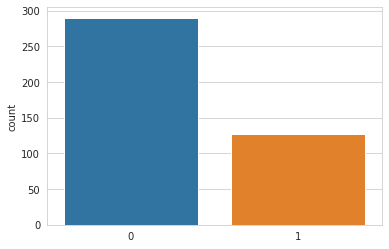

In [134]:
sns.countplot(x=y_pred)

**CONCLUSION**

The test dataset shows that more individuals perished.The knn model has a range of 82-85% among the various splits of 20,30,40%